In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [181]:
train = pd.read_csv(r"E:\Internshala\Assignment 4\train.csv")
test = pd.read_csv(r"E:\Internshala\Assignment 4\test.csv")

In [182]:
train.shape , df_test.shape

((12980, 12), (4399, 14))

In [183]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [184]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


## So, train data has target variable and the test data has the independent variables.

### Also 1st Column is Datetime or Time Stamp so we will first split it into 2 different columns (i.e Month & Hour)

## 1. Null Values Check

In [185]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Information of DataFrame

In [186]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


## Univariate Analysis

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

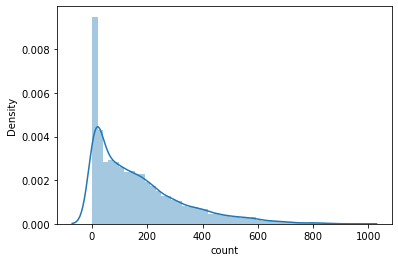

In [134]:
sns.distplot(train["count"])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

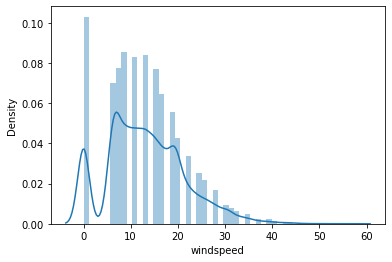

In [135]:
sns.distplot(train["windspeed"])

### Windspeed is mostly ranging between 10 & 20 

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='casual', ylabel='Density'>

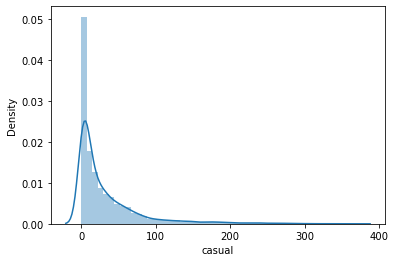

In [136]:
sns.distplot(train["casual"])

### Non-registered users is mostly till 100

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

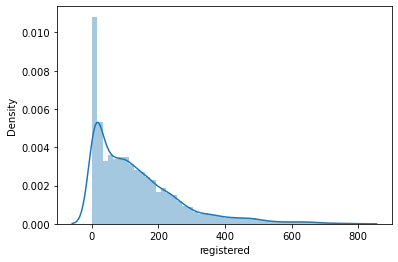

In [137]:
sns.distplot(train["registered"])

### Registered users mostly ranges till 200

### Count, Windspeed, Casual, Registered are Right Skewed so these variable needs treatment

## Bivariate Analysis

<AxesSubplot:xlabel='count', ylabel='registered'>

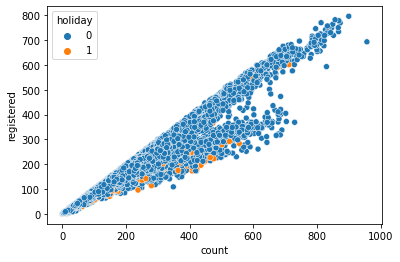

In [138]:
sns.scatterplot(x='count',y='registered',hue="holiday",data=train)

<AxesSubplot:xlabel='count', ylabel='casual'>

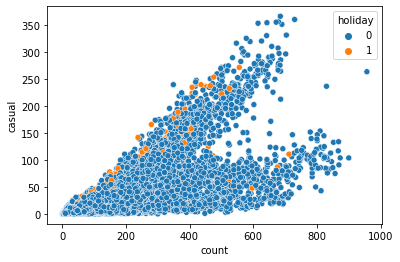

In [139]:
sns.scatterplot(x='count',y='casual',hue="holiday",data=train)

<AxesSubplot:xlabel='count', ylabel='registered'>

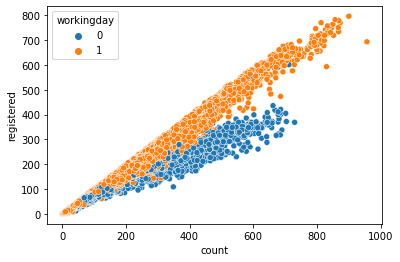

In [140]:
sns.scatterplot(x='count',y='registered',hue="workingday",data=train)

<AxesSubplot:xlabel='count', ylabel='casual'>

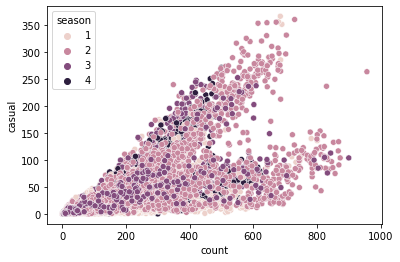

In [141]:
sns.scatterplot(x='count',y='casual',hue="season",data=train)

<AxesSubplot:xlabel='count', ylabel='registered'>

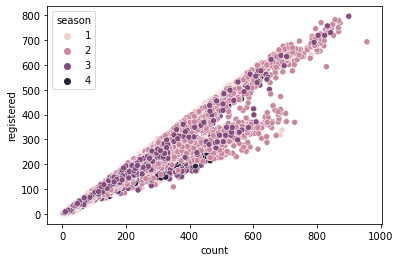

In [142]:
sns.scatterplot(x='count',y='registered',hue="season",data=train)

## 3. Correlation Analysis

<AxesSubplot:>

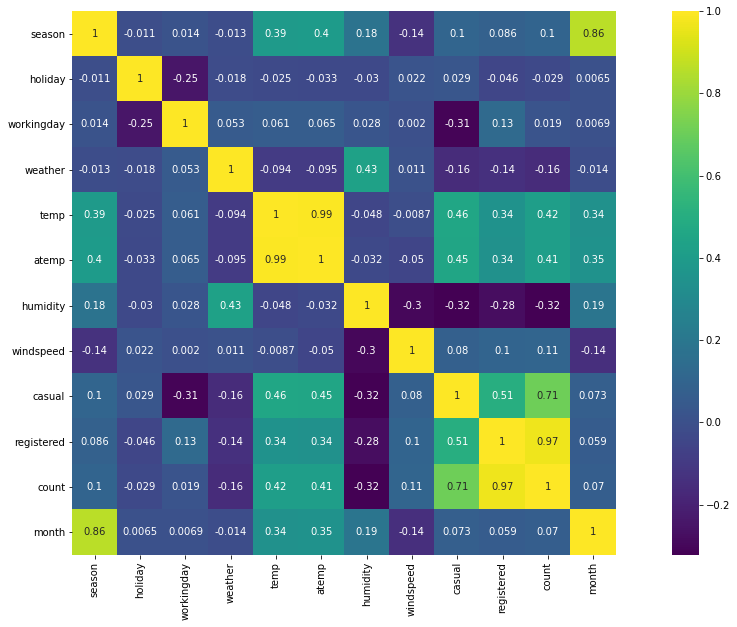

In [143]:
plt.figure(figsize=(20,10))
sns.heatmap(data=train.corr(), square=True,annot=True, cmap='viridis')

### From this we can observe that temp and atemp are highly correlated
#### *This needs to be looked after as it will create multi-collinearity problem*

### windspeed has least realation with any of the variables 
#### *So it could be dropped as it is not a useful feature*

### Registered is having very high correlation with Count compared to Casual
#### *Registered could be removed as it would create multi-collinearity problem*

### Positive Correlation:

    1.  Casual vs Count
    2.  Weather vs humidity
    3.  Temp vs Casual
    4.  Temp vs Count
    5.  Casual vs Registered
    6.  Temp vs month
    7.  Temp vs registered
    
### Negative Correlation:

    1.  Humidity vs Count
    2.  Humidity vs registered
    3.  Humidity vs Casual
    4.  Humidity vs windspeed
    5.  Workingday vs casual
    6.  Holiday vs workingday

In [187]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [189]:
from sklearn.preprocessing import PowerTransformer
b=train.drop(['datetime','season','weather','temp','count','atemp','humidity','windspeed','holiday','workingday','registered'],axis=1)
b.head()

,casual
0,3
1,8
2,5
3,3
4,0


In [190]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson = pt.fit(b)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(b)
df_ptdata = pd.DataFrame(data=skl_yeojohnson, columns=['casual'])
df_ptdata.head()

,casual
0,-0.843450
1,-0.318220
2,-0.583995
3,-0.843450
4,-1.684809


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='casual', ylabel='Density'>

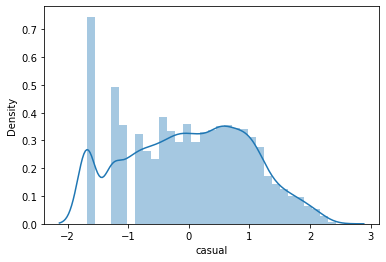

In [148]:
sns.distplot(df_ptdata['casual'])

### df_ptdata has treated casual values

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

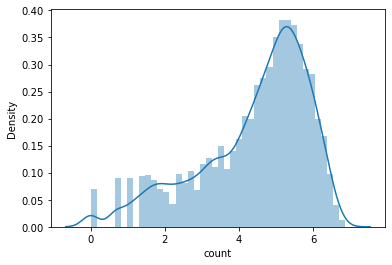

In [149]:
lcount = np.log(train['count'])
sns.distplot(lcount)

In [191]:
rdf = train.drop(['registered','atemp','casual','count','windspeed'],axis=1)

In [192]:
rdf.head()

,datetime,season,holiday,workingday,weather,temp,humidity
0,2011-01-01 0:00:00,1,0,0,1,9.84,81.0
1,2011-01-01 1:00:00,1,0,0,1,9.02,80.0
2,2011-01-01 2:00:00,1,0,0,1,9.02,80.0
3,2011-01-01 3:00:00,1,0,0,1,9.84,75.0
4,2011-01-01 4:00:00,1,0,0,1,9.84,75.0


In [193]:
train=pd.concat([rdf,df_ptdata,lcount],axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,humidity,casual,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,81.0,-0.843450,2.772589
1,2011-01-01 1:00:00,1,0,0,1,9.02,80.0,-0.318220,3.688879
2,2011-01-01 2:00:00,1,0,0,1,9.02,80.0,-0.583995,3.465736
3,2011-01-01 3:00:00,1,0,0,1,9.84,75.0,-0.843450,2.564949
4,2011-01-01 4:00:00,1,0,0,1,9.84,75.0,-1.684809,0.000000


In [194]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
train.head()

,datetime,season,holiday,workingday,weather,temp,humidity,casual,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,81.0,-0.843450,2.772589,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,80.0,-0.318220,3.688879,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,80.0,-0.583995,3.465736,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,75.0,-0.843450,2.564949,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,75.0,-1.684809,0.000000,2011-01-01,4,1


In [195]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,hour,month
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,2012-06-30,1,6
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2012-06-30,2,6
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,2012-06-30,3,6
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,2012-06-30,4,6
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,2012-06-30,5,6


In [196]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [197]:
training = training.drop(['datetime','date','weather'],axis=1)
validation = validation.drop(['datetime','date','weather'],axis=1)

In [198]:
training.head()

,season,holiday,workingday,temp,humidity,casual,count,hour,month
0,1,0,0,9.84,81.0,-0.843450,2.772589,0,1
1,1,0,0,9.02,80.0,-0.318220,3.688879,1,1
2,1,0,0,9.02,80.0,-0.583995,3.465736,2,1
3,1,0,0,9.84,75.0,-0.843450,2.564949,3,1
4,1,0,0,9.84,75.0,-1.684809,0.000000,4,1


In [199]:
validation.head()

,season,holiday,workingday,temp,humidity,casual,count,hour,month
10774,2,0,1,15.58,50.0,-0.483705,3.295837,1,3
10775,2,0,1,14.76,53.0,-1.272782,1.945910,2,3
10776,2,0,1,13.94,61.0,-1.684809,1.945910,3,3
10777,2,0,1,13.94,53.0,-1.272782,0.693147,4,3
10778,2,0,1,13.12,61.0,-1.684809,3.258097,5,3


In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Now our data is ready. Before making the model, we will create a validation set to validate our model. So, we will divide the train set into training and validation set. We will train the model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time. Let's take first 15 months for training and remaining 3 months in the validation set. 

In [201]:
X_train = training.drop('count', 1)
y_train = training['count']
X_val = validation.drop('count', 1)
y_val = validation['count']

In [203]:
X_val.head()

,season,holiday,workingday,temp,humidity,casual,hour,month
10774,2,0,1,15.58,50.0,-0.483705,1,3
10775,2,0,1,14.76,53.0,-1.272782,2,3
10776,2,0,1,13.94,61.0,-1.684809,3,3
10777,2,0,1,13.94,53.0,-1.272782,4,3
10778,2,0,1,13.12,61.0,-1.684809,5,3


In [204]:
X_train.shape ,y_train.shape, X_val.shape, y_val.shape

((10774, 8), (10774,), (2206, 8), (2206,))

In [205]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_val)

In [206]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [207]:
rmsle(y_val,y_pred)

0.6391942111355043

In [208]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,hour,month
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,2012-06-30,1,6
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2012-06-30,2,6
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,2012-06-30,3,6
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,2012-06-30,4,6
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,2012-06-30,5,6


In [209]:
test = test.drop(['datetime','atemp','windspeed','weather','registered','date'], axis=1)

In [214]:
test.head()

,season,holiday,workingday,temp,humidity,casual,hour,month
0,3,0,0,26.24,89.0,3,1,6
1,3,0,0,26.24,89.0,7,2,6
2,3,0,0,26.24,89.0,3,3,6
3,3,0,0,25.42,94.0,3,4,6
4,3,0,0,26.24,89.0,3,5,6


In [210]:
test_prediction = model.predict(test)

## Decision Tree

In [213]:
from sklearn.tree import DecisionTreeRegressor

In [300]:
dt_reg = DecisionTreeRegressor(max_depth=10)

In [301]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [302]:
predict = dt_reg.predict(X_val)

In [303]:
# calculating rmsle of the predicted values
rmsle(y_val, predict)

0.382570989531845

In [304]:
test_prediction = dt_reg.predict(test)

In [305]:
final_prediction = np.exp(test_prediction)

In [309]:
submission = pd.DataFrame()

In [310]:
# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [311]:
submission.to_csv('submission.csv', header=True, index=False)